# 실습

In [5]:
#광진구와 가장 비슷한 인구 구조를 가진 동네를 찾아 시각화하기
import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

f = open('seoul3.csv')
data = csv.reader(f)
next(data)

seoul = []
name = []
# for row in data:
#     for i in range(3,104):
#         seoul.append(row[i].replace(',',''))

for line in data:
    seoul.append(line[3:])
    name.append(line[0])
f.close()

#print(name)
seoul2 = []
for line in seoul:
    tmp = []
    for r in line:
        tmp.append(r.replace(',',''))
    seoul2.append(tmp)

    
#numpy 이용
xy = np.array(seoul2[1:])
xy = xy.astype(float)
print(xy)
# plt.plot(xy)
# plt.show()

#광진구
konkuk = xy[4]
print(konkuk)



[[ 469.  585.  586. ...   57.   44.  276.]
 [ 612.  624.  623. ...   36.   27.  205.]
 [1085. 1221. 1249. ...   70.   55.  371.]
 ...
 [2159. 2504. 2594. ...   60.   64.  296.]
 [3532. 4052. 4269. ...   79.   59.  299.]
 [2575. 2978. 2974. ...   57.   43.  255.]]
[1402. 1612. 1672. 1753. 1912. 2163. 2101. 2194. 2426. 2337. 2378. 2242.
 2456. 2643. 2518. 2376. 2596. 2750. 2683. 3289. 4248. 4483. 5160. 5796.
 6506. 6970. 7422. 7421. 7687. 7247. 6269. 6140. 5891. 5481. 5332. 5298.
 4959. 5413. 5653. 5547. 5438. 5268. 4397. 5018. 4753. 4964. 5306. 5561.
 5708. 6069. 5861. 5766. 5842. 5539. 5114. 5360. 5168. 4975. 5367. 5549.
 5659. 5241. 4941. 4817. 4264. 4541. 3715. 3249. 3645. 2388. 2656. 2546.
 2765. 2702. 2183. 1869. 1940. 1894. 2134. 1739. 1459. 1434. 1255. 1066.
  891.  835.  636.  494.  441.  339.  281.  259.  184.  169.   97.   83.
   68.   53.   46.   37.  218.]


In [6]:
df = pd.DataFrame(xy)
print(df)

df_konkuk = df[4]
print(df_konkuk)

       0       1       2       3       4       5       6       7       8    \
0    469.0   585.0   586.0   676.0   764.0   843.0   869.0   833.0   990.0   
1    612.0   624.0   623.0   682.0   740.0   729.0   682.0   720.0   743.0   
2   1085.0  1221.0  1249.0  1288.0  1455.0  1473.0  1411.0  1382.0  1507.0   
3   1873.0  1935.0  1967.0  2058.0  2228.0  2226.0  2099.0  2032.0  2068.0   
4   1402.0  1612.0  1672.0  1753.0  1912.0  2163.0  2101.0  2194.0  2426.0   
5   1631.0  1860.0  1850.0  2008.0  2168.0  2306.0  2224.0  2145.0  2363.0   
6   1761.0  2012.0  2092.0  2191.0  2475.0  2559.0  2321.0  2483.0  2624.0   
7   2013.0  2217.0  2380.0  2594.0  3016.0  3218.0  3173.0  3163.0  3503.0   
8   1003.0  1149.0  1309.0  1503.0  1651.0  1694.0  1658.0  1807.0  1979.0   
9   1171.0  1450.0  1590.0  1756.0  1948.0  2049.0  2169.0  2016.0  2333.0   
10  2188.0  2478.0  2595.0  2968.0  3274.0  3705.0  3717.0  3778.0  4278.0   
11  2090.0  2379.0  2538.0  2743.0  3089.0  3353.0  3197.0  3204

In [7]:
result = df.sub(konkuk) #sub
result2 = result.abs() #절댓값

result3 = np.square(result2) #제곱 numpy로
#result4 = result2.pow(2) #dataframe으로 하는 법
#print(result2)
#print(result3)

#각 행 더해서 가장 큰 값 구하기
result5 = result3.sum(axis=1)
print(result5)

#0인 행 Nan으로 바꾸기
gwangzinIndex = np.argmin(result5)
result5[gwangzinIndex] = np.nan
# print(np.min(result5[result5>0]))
# print(np.max(result5))


minIndex = np.argmin(result5)
maxIndex = np.argmax(result5)


0     5.748381e+08
1     7.051928e+08
2     2.211140e+08
3     6.268373e+07
4     0.000000e+00
5     2.171238e+07
6     7.090160e+07
7     1.242201e+08
8     9.372752e+07
9     8.410580e+07
10    4.691379e+08
11    2.457794e+08
12    4.226505e+07
13    2.258299e+07
14    2.494388e+08
15    7.329845e+08
16    7.273502e+07
17    2.004366e+08
18    3.752136e+07
19    2.576956e+07
20    4.703556e+08
21    1.664188e+08
22    5.787845e+08
23    1.389770e+09
24    2.073350e+08
dtype: float64


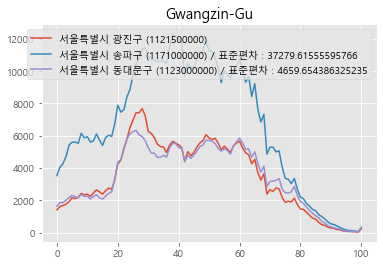

In [23]:
# .loc[] 은 인덱스(index)를 기준으로 행 데이터를 추출합니다. 
# • .iloc[]은 행 번호를 기준으로 행 데이터를 추출합니다. 
import math

gwangzin = df.loc[gwangzinIndex] #df.loc[index] : dataframe에서 행 뽑아오기
maxLoc = df.loc[maxIndex] 
minLoc = df.loc[minIndex]

plt.title('Gwangzin-Gu')
plt.style.use('ggplot') #격자무늬
plt.rc('font', family='Malgun Gothic') #폰트

#표준편차 ()
minSD = math.sqrt(float(result5[minIndex]))
maxSD = math.sqrt(float(result5[maxIndex]))

plt.plot(gwangzin,label=name[gwangzinIndex+1])
plt.plot(maxLoc,label=name[maxIndex+1]+" / 표준편차 : "+str(maxSD))
plt.plot(minLoc,label=name[minIndex+1]+" / 표준편차 : "+str(minSD))
plt.legend()
plt.show()

# 수업

In [9]:
import numpy as np
print("2의 제곱 : ",np.sqrt(4))
print("파이 : ",np.pi)
print("sin : ",np.sin(0))
print("cos : ",np.cos(np.pi))

print(np.random.rand(5))
print(np.random.choice(6,10)) #0~6사이 값 10개를 출력해라
print(np.random.choice(10,6,replace=False))#중복X
print(np.random.choice(6,10,p=[0.1,0.2,0.3,0.2,0.1,0.1]))#확률값

2의 제곱 :  2.0
파이 :  3.141592653589793
sin :  0.0
cos :  -1.0
[0.76220875 0.44349248 0.31795278 0.19273919 0.81178927]
[2 2 3 5 0 3 0 0 1 1]
[8 0 2 6 4 1]
[2 3 1 4 2 0 2 3 2 2]


In [22]:
#리스트로 ndarray(N-Dimensional Array)만들기
a = np.array([1,2,3,4])
print(a)

print(np.zeros(10)) #0으로 이루어진 크기 10 배열 생성
print(np.ones(10))

print(np.arange(3))
print(np.arange(3,7))
print(np.arange(3,7,2))

print(np.arange(1,2,0.1))
print(np.linspace(1,2,11)) #1부터 2까지 11개 구간으로 나눈 실수 생성

print(np.arange(-np.pi,np.pi,np.pi/10))
print(np.linspace(-np.pi,np.pi,20))

[1 2 3 4]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0 1 2]
[3 4 5 6]
[3 5]
[1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9]
[1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2. ]
[-3.14159265 -2.82743339 -2.51327412 -2.19911486 -1.88495559 -1.57079633
 -1.25663706 -0.9424778  -0.62831853 -0.31415927  0.          0.31415927
  0.62831853  0.9424778   1.25663706  1.57079633  1.88495559  2.19911486
  2.51327412  2.82743339]
[-3.14159265 -2.81089869 -2.48020473 -2.14951076 -1.8188168  -1.48812284
 -1.15742887 -0.82673491 -0.49604095 -0.16534698  0.16534698  0.49604095
  0.82673491  1.15742887  1.48812284  1.8188168   2.14951076  2.48020473
  2.81089869  3.14159265]


In [28]:
a = np.arange(10).reshape(2,5)
print(a)

print(a.shape) #행,열
print(a.ndim) #차원 (=axix)
print(a.size) #행*열 

print("1행 2열 : ",a[1,2]) #행,열은 0부터

[[0 1 2 3 4]
 [5 6 7 8 9]]
(2, 5)
2
10
1행 2열 :  7


In [35]:
#행렬 연산
a = np.array([1,2,3,3,2,5]).reshape(2,3)
b = np.array([[-1,3,5],[1,4,2]])
print(a)
print(b)

print("a+b")
print(a+b)

print("a-b")
print(a-b)

print("a*b")
print(a*b)

print("a/b")
print(a/b)

#내적
print("a내적bT")
print(np.dot(a,b.transpose()))
print("aT내적b")
print(np.dot(a.T,b))

[[1 2 3]
 [3 2 5]]
[[-1  3  5]
 [ 1  4  2]]
a+b
[[0 5 8]
 [4 6 7]]
a-b
[[ 2 -1 -2]
 [ 2 -2  3]]
a*b
[[-1  6 15]
 [ 3  8 10]]
a/b
[[-1.          0.66666667  0.6       ]
 [ 3.          0.5         2.5       ]]
a내적bT
[[20 15]
 [28 21]]
aT내적b
[[ 2 15 11]
 [ 0 14 14]
 [ 2 29 25]]


In [37]:
print(np.zeros(10)+5)

print(np.sqrt(np.linspace(1,2,11)))

[5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
[1.         1.04880885 1.09544512 1.14017543 1.18321596 1.22474487
 1.26491106 1.30384048 1.34164079 1.37840488 1.41421356]


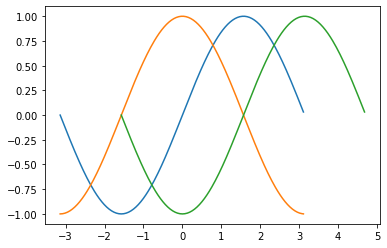

In [40]:
import matplotlib.pyplot as plt
import numpy as np

a = np.arange(-np.pi,np.pi,np.pi/100)
plt.plot(a,np.sin(a))
plt.plot(a,np.cos(a))
plt.plot(a+np.pi/2,np.sin(a))
plt.show()

In [47]:
#mask
a = np.arange(-5,5)
print(a<0)
print(a[a<0])

mask1 = abs(a) > 3
print(a[mask1])
mask2 = abs(a) %2 == 0
print(a[mask2])

print(a[mask1+mask2]) #OR : 둘 중 하나라도 참일 경우
print(a[mask1*mask2]) #And : 두가지 모두가 참일 경우


[ True  True  True  True  True False False False False False]
[-5 -4 -3 -2 -1]
[-5 -4  4]
[-4 -2  0  2  4]
[-5 -4 -2  0  2  4]
[-4  4]


ValueError: x and y must be the same size

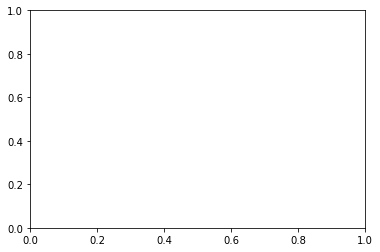

In [3]:
import matplotlib.pyplot as plt
import numpy as np

#버블 차트 그리기
x = np.random.randint(-100,100,1000) #1000개 랜덤값
y = np.random.randint(-100,100,1000)

size = np.random.rand(100) * 500 #0~100사이가 1000개 만들어짐

mask1 = abs(x) > 50
mask2 = abs(y) > 50

x = x[mask1 + mask2]
y = y[mask1 * mask2]

plt.scatter(x,y,s=size, c=x, cmap='jet',alpha=0.7)
plt.colorbar()
plt.show()

# Pandas

In [13]:
# series : 1차원(=벡터)
# dataframe : 2차원(=행렬)

# 공공데이터 이전 동단위 -> 구단위
# 화양동X , 광진구 기준으로 가장 빗스한 구, 가장 다른 구 찾아주기

import pandas as pd
index = pd.date_range('1/1/2000',periods = 8)
print(index)

df = pd.DataFrame(np.random.rand(8,3), index = index, columns = list('ABC'))
print(df)

print("\n특정 열B에 접근 : \n",df['B'])

print("\n특정 열B에 마스크 : \n",df['B'] > 0.4)

print("\n특정 열B에 마스크 출력 : \n",df[df['B'] > 0.4])

print("\nTranspose : \n",df.T)

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08'],
              dtype='datetime64[ns]', freq='D')
                   A         B         C
2000-01-01  0.455300  0.542692  0.331129
2000-01-02  0.019685  0.903052  0.582354
2000-01-03  0.455487  0.465343  0.264400
2000-01-04  0.342041  0.678243  0.314037
2000-01-05  0.821567  0.991222  0.062777
2000-01-06  0.426917  0.401981  0.876345
2000-01-07  0.716801  0.032166  0.906535
2000-01-08  0.172092  0.481524  0.077513

특정 열B에 접근 : 
 2000-01-01    0.542692
2000-01-02    0.903052
2000-01-03    0.465343
2000-01-04    0.678243
2000-01-05    0.991222
2000-01-06    0.401981
2000-01-07    0.032166
2000-01-08    0.481524
Freq: D, Name: B, dtype: float64

특정 열B에 마스크 : 
 2000-01-01     True
2000-01-02     True
2000-01-03     True
2000-01-04     True
2000-01-05     True
2000-01-06     True
2000-01-07    False
2000-01-08     True
Freq: D, Name: B, dtype: bool

특

In [15]:
df['D'] = df['A'] / df['B']
print(df)

df['E'] = np.sum(df, axis = 1) #0이면 행, 1이면 열 : 열을 기준으로 더해라
df.head()

                   A         B         C          D
2000-01-01  0.455300  0.542692  0.331129   0.838966
2000-01-02  0.019685  0.903052  0.582354   0.021798
2000-01-03  0.455487  0.465343  0.264400   0.978820
2000-01-04  0.342041  0.678243  0.314037   0.504304
2000-01-05  0.821567  0.991222  0.062777   0.828842
2000-01-06  0.426917  0.401981  0.876345   1.062035
2000-01-07  0.716801  0.032166  0.906535  22.284463
2000-01-08  0.172092  0.481524  0.077513   0.357390


,A,B,C,D,E
2000-01-01,0.455300,0.542692,0.331129,0.838966,2.168087
2000-01-02,0.019685,0.903052,0.582354,0.021798,1.526888
2000-01-03,0.455487,0.465343,0.264400,0.978820,2.164050
2000-01-04,0.342041,0.678243,0.314037,0.504304,1.838625
2000-01-05,0.821567,0.991222,0.062777,0.828842,2.704408


In [16]:
#모든 값을 C열의 값으로 나눈 후 csv파일 저장하기

df = df.div(df['C'],axis = 0) #A를 C로 나누고, B를 C로 나누고... 
df.to_csv('test.csv')
df.head()

,A,B,C,D,E
2000-01-01,1.374991,1.638912,1.0,2.533650,6.547553
2000-01-02,0.033802,1.550692,1.0,0.037431,2.621925
2000-01-03,1.722718,1.759994,1.0,3.702043,8.184756
2000-01-04,1.089173,2.159755,1.0,1.605874,5.854802
2000-01-05,13.086963,15.789449,1.0,13.202858,43.079270


# 위키피디아 데이터 엑셀 저장하기

In [18]:
df = pd.read_html('https://en.wikipedia.org/wiki/All-time_Olympic_Games_medal_table')
print(df)

[                                       Olympic Games
0                                        Main topics
1  Bids Boycotts Ceremonies Charter Host cities I...
2                                              Games
3  Summer Winter Youth African Asian European Pac...
4  .mw-parser-output .navbar{display:inline;font-...,                                              Team Summer Games  \
                                  Team (IOC code)            №   
0                               Afghanistan (AFG)           14   
1                                   Algeria (ALG)           13   
2                                 Argentina (ARG)           24   
3                                   Armenia (ARM)            6   
4                         Australasia (ANZ) [ANZ]            2   
..                                            ...          ...   
148                          Zimbabwe (ZIM) [ZIM]           13   
149      Independent Olympic Athletes (IOA) [IOA]            3   
150  Independent Oly

In [20]:
df[1] #1번 인덱스만 출력

Team Summer Games  \
                                  Team (IOC code)            №   
0                               Afghanistan (AFG)           14   
1                                   Algeria (ALG)           13   
2                                 Argentina (ARG)           24   
3                                   Armenia (ARM)            6   
4                         Australasia (ANZ) [ANZ]            2   
..                                            ...          ...   
148                          Zimbabwe (ZIM) [ZIM]           13   
149      Independent Olympic Athletes (IOA) [IOA]            3   
150  Independent Olympic Participants (IOP) [IOP]            1   
151                        Mixed team (ZZX) [ZZX]            3   
152                                        Totals           28   

                                                                     \
    Unnamed: 2_level_1 Unnamed: 3_level_1 Unnamed: 4_level_1  Total   
0                    0                  0                  2      2   
1                    5                  4                  8     17   
2                   21                 25                 28     74   
3                    2                  6                  6     14   
4                    3                  4                  5     12   
..                 ...                ...                ...    ...   
148                  3                  4                  1      8   
149                  1                  0                  1      2   
150                  0                  1                  2      3   
151                  8                  5                  4     17   
152               5116               5080               5487  15683   

    Winter Games                                                           \
               № Unnamed: 7_level_1 Unnamed: 8_level_1 Unnamed: 9_level_1   
0              0                  0                  0                  0   
1              3                  0                  0                  0   
2             19                  0                  0                  0   
3              7                  0                  0                  0   
4              0                  0                  0                  0   
..           ...                ...                ...                ...   
148            1                  0                  0                  0   
149            0                  0                  0                  0   
150            0                  0                  0                  0   
151            0                  0                  0                  0   
152           23               1062               1059               1050   

          Combined Total                                          \
    Total              № Unnamed: 12_level_1 Unnamed: 13_level_1   
0       0             14                   0                   0   
1       0             16                   5                   4   
2       0             43                  21                  25   
3       0             13                   2                   6   
4       0              2                   3                   4   
..    ...            ...                 ...                 ...   
148     0             14                   3                   4   
149     0              3                   1                   0   
150     0              1                   0                   1   
151     0              3                   8                   5   
152  3171             51                6178                6139   

                                
    Unnamed: 14_level_1  Total  
0                     2      2  
1                     8     17  
2                    28     74  
3                     6     14  
4                     5     12  
..                  ...    ...  
148                   1      8  
149                   1      2  
150                   2      3  
151         

In [22]:
df = pd.read_html('https://en.wikipedia.org/wiki/All-time_Olympic_Games_medal_table',header =  0, index_col = 0)
df[1]

,Summer Games,Summer Games.1,Summer Games.2,Summer Games.3,Summer Games.4,Winter Games,Winter Games.1,Winter Games.2,Winter Games.3,Winter Games.4,Combined Total,Combined Total.1,Combined Total.2,Combined Total.3,Combined Total.4
Team,,,,,,,,,,,,,,,
Team (IOC code),№,NaN,NaN,NaN,Total,№,NaN,NaN,NaN,Total,№,NaN,NaN,NaN,Total
Afghanistan (AFG),14,0.0,0.0,2.0,2,0,0.0,0.0,0.0,0,14,0.0,0.0,2.0,2
Algeria (ALG),13,5.0,4.0,8.0,17,3,0.0,0.0,0.0,0,16,5.0,4.0,8.0,17
Argentina (ARG),24,21.0,25.0,28.0,74,19,0.0,0.0,0.0,0,43,21.0,25.0,28.0,74
Armenia (ARM),6,2.0,6.0,6.0,14,7,0.0,0.0,0.0,0,13,2.0,6.0,6.0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zimbabwe (ZIM) [ZIM],13,3.0,4.0,1.0,8,1,0.0,0.0,0.0,0,14,3.0,4.0,1.0,8
Independent Olympic Athletes (IOA) [IOA],3,1.0,0.0,1.0,2,0,0.0,0.0,0.0,0,3,1.0,0.0,1.0,2
Independent Olympic Participants (IOP) [IOP],1,0.0,1.0,2.0,3,0,0.0,0.0,0.0,0,1,0.0,1.0,2.0,3


In [29]:
#하계만 (앞에서 5개만 슬라이싱)
summer = df[1].iloc[:,:5] #행 : 모든 행 다 가져오기, 열 : 0~4 가져오기

summer.columns = ['경기수','금','은','동','계']
summer.sort_values('금', ascending = False) #내림차순 정리
summer
summer.to_excel('하계올림픽메달.xlsx')